In [54]:
%matplotlib inline
import numpy as np
import math as m
import scipy.constants as c


import sys
sys.path.append('C:/Users/Bukacek/scripts')
from LD import LD


import matplotlib.pyplot as plt

yellow='#ffb200'
red='#DD5544'
blue='#0284C0'

In [55]:
lamda = np.linspace(300E-9, 1000E-9,100) 
gold = LD(lamda, material = 'Au',model = 'LD')

epm=np.real(gold.eps(750e-9))


In [87]:
def sigma(lm, R, zp):
    lamda = np.linspace(300E-9, 1000E-9,100) 
    gold = LD(lamda, material = 'Au',model = 'LD')

    epm=np.real(gold.eps(750e-9))
    epd=1.33
    epp=epm

    epspp=epd*epm/(epd+epm)

    k0=2*m.pi/lm
    kspp=k0*(epspp**0.5)

    
    a=(-1*epd/epm)**0.5
    beta=(R/(2*zp))**3
    ksi=((epd-epm)*(epp-epd))/((epd+epm)*(epp+2*epd))
    eta=0
    alfa0=c.epsilon_0*epd*(4/3*m.pi*R**3)*3*(epp-epd)/(epp+2*epd)
    
    sigma_nom=a**2*k0**4*kspp*(2+eta**2)
    sigma_denom=2*c.epsilon_0**2*(1-a**4)**2*(1-a**2)**2
    sigma_end=(alfa0/(1+2*beta*ksi))**2*m.exp(-4*a*kspp*zp)
    return sigma_nom/sigma_denom*sigma_end

In [88]:

sigma(lm=750e-9, R=40e-9, zp=50e-9)

7.584934657154902e-09

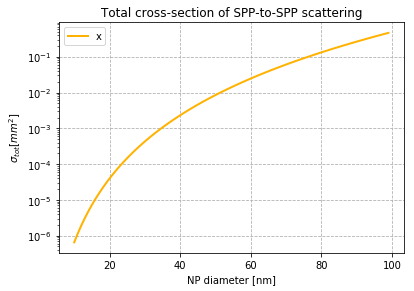

In [96]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.grid(linestyle='--')
axes.set_title('Total cross-section of SPP-to-SPP scattering')
axes.set_xlabel('NP diameter [nm]')
axes.set_ylabel('$\sigma_{tot} [mm^2]$')
axes.set_yscale('log')

# x=np.linspace(300E-9, 1000E-9,100) 
# y=[sigma(lm=i, R=10e-9, zp=50e-9) for i in x]

x = np.arange(10, 100,1)
y=[sigma(lm=750e-9, R=i*1e-9, zp=i/2*1e-9+100e-9)*1e6 for i in x]


name='test_01'
axes.plot(x, y, color=yellow, linewidth=2, label='x')
# axes.plot(x, x**3, color=blue, linewidth=2, label='y')
axes.legend(loc=2)